# 3 Predictive Algorithms for Classification (Final Project)

Importing warnings and supressing them with the below code. Importing Pandas, Seaborn, MatPlotLib, and Numpy as well.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

First, we will upload and read the dataset into a dataframe.

In [ ]:
#uploading the dataset

from google.colab import files
upload = files.upload()

Saving diabetes_prediction_dataset_sample.csv to diabetes_prediction_dataset_sample.csv


In [ ]:
# reading data into dataframe, then displaying first 5 rows
diabetes_df = pd.read_csv('diabetes_prediction_dataset_sample.csv')
diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0


* The 1 in the gender column represents 'Male' and the 0 represents 'Female.' 

The other columns' 0s and 1s represent the presence of the value with 0 meaning none and 1 meaning present/diagnosed.

* Important Note: I converted the gender column from an object type to a integer type in Excel using the Replace function. The gender column only had two values prior (Male and Female), so using excel was the easiest way to do this conversion. 

In [ ]:
# Displaying the dataframe info
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10099 entries, 0 to 10098
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               10099 non-null  int64  
 1   age                  10099 non-null  float64
 2   hypertension         10099 non-null  int64  
 3   heart_disease        10099 non-null  int64  
 4   smoking_history      10099 non-null  object 
 5   bmi                  10099 non-null  float64
 6   HbA1c_level          10099 non-null  float64
 7   blood_glucose_level  10099 non-null  int64  
 8   diabetes             10099 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 710.2+ KB


 Now I will partition the data into X feature matrix and y target variable.
The target variable is **diabetes**

In [ ]:
# Define X and y
X = diabetes_df.drop(['smoking_history', 'diabetes'], axis = 1)

In [ ]:
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155


Dropping the smoking_history column as it is seemingly irrelevant to our analysis and due to the fact it has too many varied values that might mess up the models' calculations.

In [ ]:
y = diabetes_df.diabetes

In [ ]:
# partition the data into training and testing sets
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# oberving the lengths of the X_train and X_test variables
len(X_train), len(X_test)

(7069, 3030)

# 1.) Decision Trees. This is the start of the use of the predicitive algorithms.

First, we will import and instantiate the Decision Tree Classifier.

In [ ]:
# import DT classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate DT model
dtree = DecisionTreeClassifier()

Fitting the basic decision tree and plotting the Decision Tree with **plot_tree** function

In [ ]:
# fit DT
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

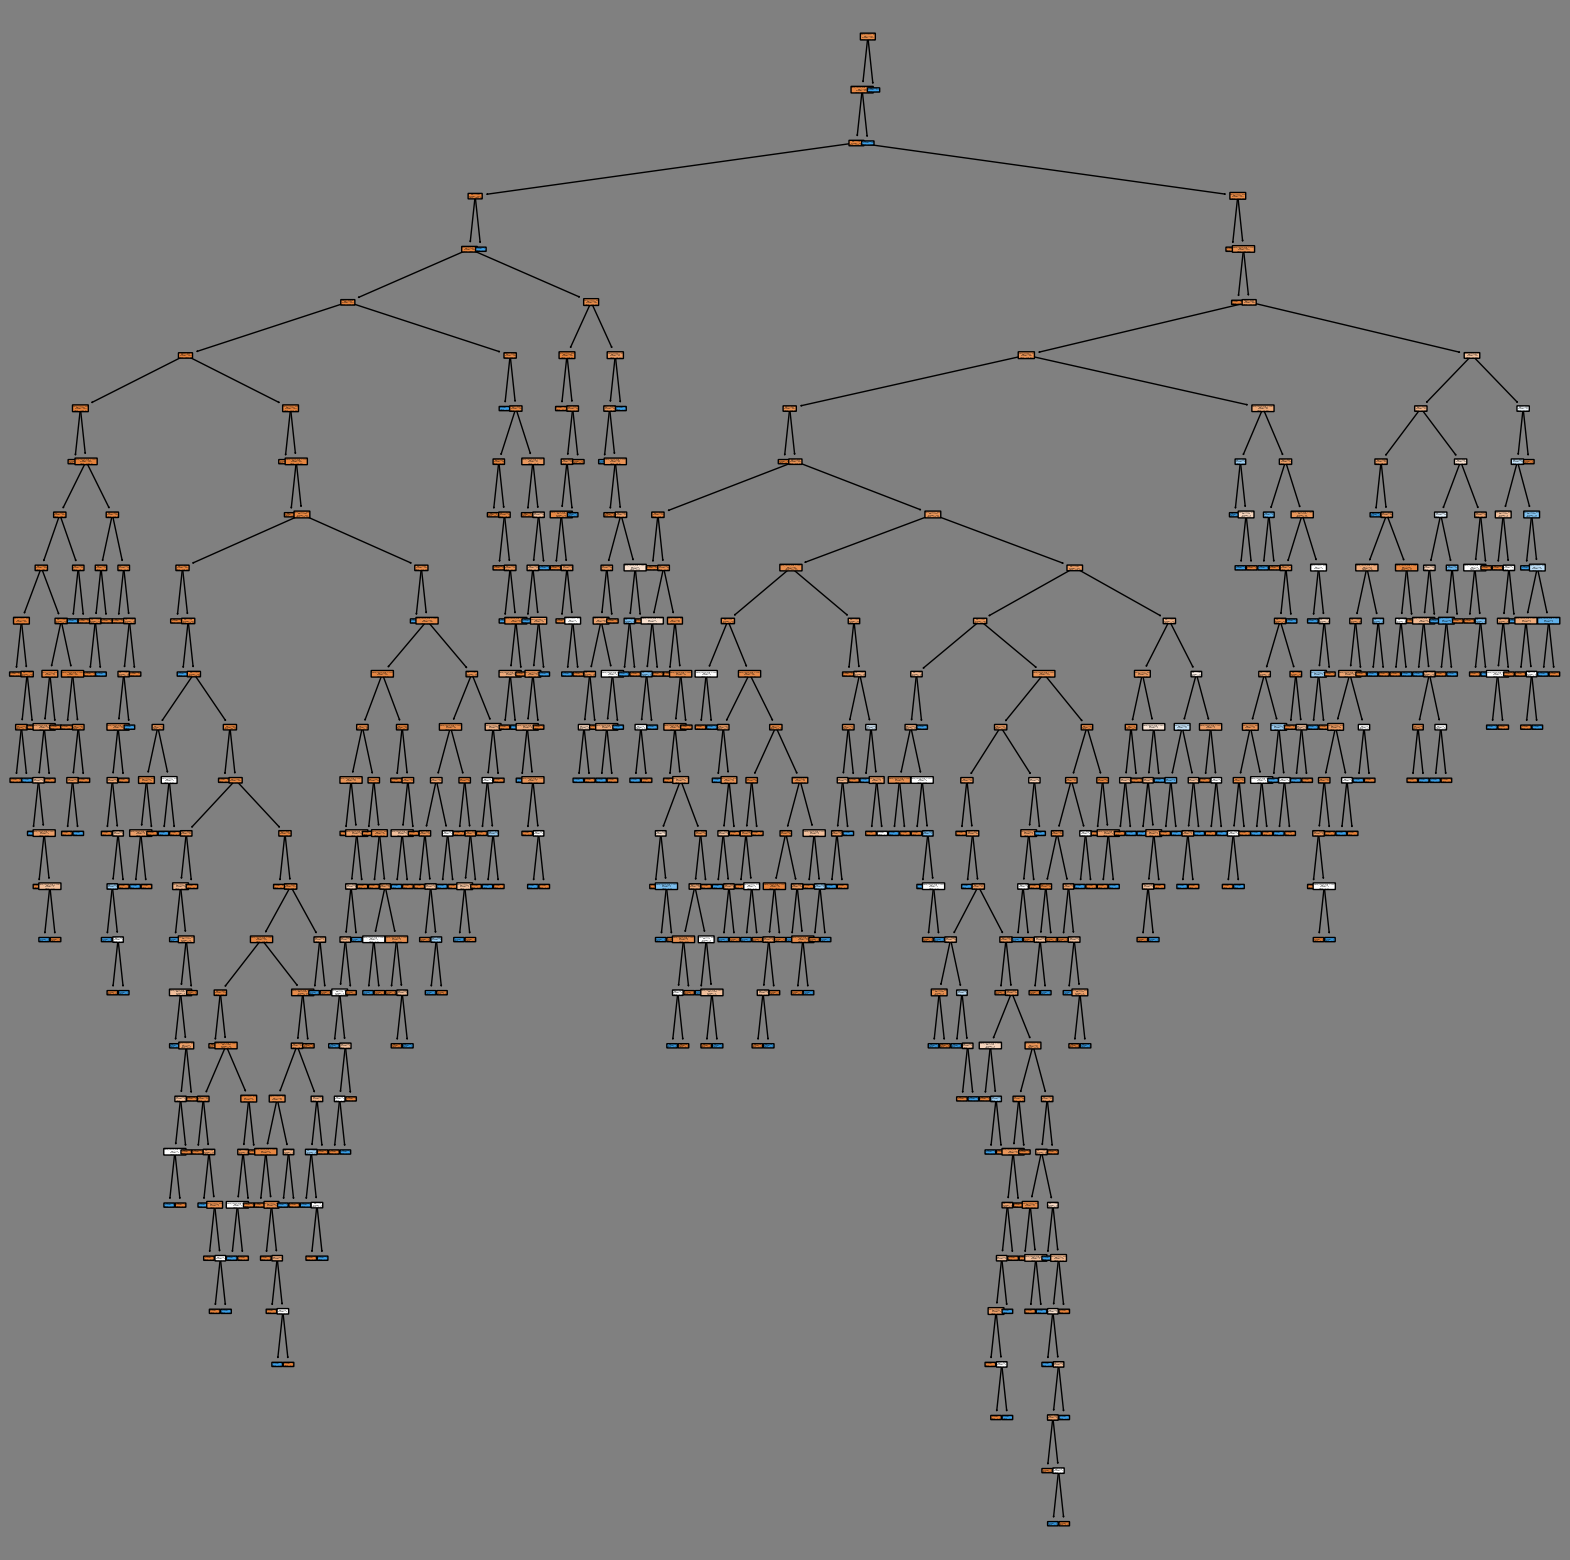

In [ ]:
# Visualize the tree using tree.plot_tree
import matplotlib.pyplot as plt
from sklearn import tree

fig, ax = plt.subplots(figsize=(20, 20), facecolor='gray')
tree.plot_tree(dtree, feature_names=X.columns, filled=True, rounded=True);

The tree is much more complex than I initially believed, so we will have to prune it. However, we can still check its accuracy score and print a classfication report.

In [ ]:
# importing accuracy score
from sklearn.metrics import accuracy_score

In [ ]:
# creating y_pred variable
y_pred_dt = dtree.predict(X_test)

In [ ]:
# creating classification report for performance measures
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2753
           1       0.73      0.75      0.74       277

    accuracy                           0.95      3030
   macro avg       0.85      0.86      0.86      3030
weighted avg       0.95      0.95      0.95      3030



In [ ]:
# calculating the accuracy score
accuracy_score(y_test, y_pred_dt)

0.9514851485148514

Displaying the ROC Curve and AUC Score

In [ ]:
# constructing an ROC curve and report AUC value
from sklearn.metrics import RocCurveDisplay

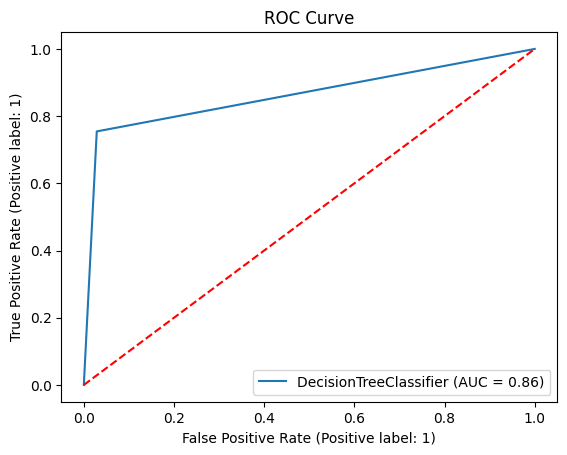

In [ ]:
dt_roc = RocCurveDisplay.from_estimator(dtree, X_test, y_test)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title('ROC Curve');

Using MCCP (Minimal Cost-Complexity Pruning) to prune the Decision Tree

In [ ]:
# Creating dtree_ccp variable for use with ccp_alphas later
dtree_ccp = dtree.cost_complexity_pruning_path(X_train, y_train)

In [ ]:
dtree_ccp

{'ccp_alphas': array([0.00000000e+00, 6.80109253e-05, 6.95118560e-05, 8.48776347e-05,
        8.66504896e-05, 8.70539844e-05, 8.80212508e-05, 8.91577083e-05,
        9.17596051e-05, 9.17596051e-05, 9.18272745e-05, 9.18903168e-05,
        9.26244030e-05, 9.41404565e-05, 9.43084830e-05, 9.43084830e-05,
        9.43084830e-05, 9.68973434e-05, 1.06097043e-04, 1.06097043e-04,
        1.06097043e-04, 1.06097043e-04, 1.06097043e-04, 1.10860584e-04,
        1.12527167e-04, 1.13170180e-04, 1.13170180e-04, 1.13170180e-04,
        1.17885604e-04, 1.17885604e-04, 1.19671749e-04, 1.21253764e-04,
        1.22601028e-04, 1.22601028e-04, 1.22601028e-04, 1.22601028e-04,
        1.28602477e-04, 1.30180163e-04, 1.31358244e-04, 1.31425372e-04,
        1.31526797e-04, 1.34017318e-04, 1.34726404e-04, 1.35032601e-04,
        1.35212173e-04, 1.40051234e-04, 1.41462725e-04, 1.47685396e-04,
        1.62044201e-04, 1.65039845e-04, 1.68408005e-04, 1.76828406e-04,
        1.76869926e-04, 1.78789380e-04, 1.79859750

In [ ]:
# Creating complexity parameter ccp_alpha
ccp_alphas = dtree_ccp.ccp_alphas

In [ ]:
# creating the param_grid
param_grid = {'ccp_alpha': ccp_alphas,
              'max_depth': range(1,11),
              'min_samples_leaf': range(1,11),
              'criterion': ['gini', 'entropy']}

Using GridSearchCV

In [ ]:
# importing GridSearch
from sklearn.model_selection import GridSearchCV

In [ ]:
search = GridSearchCV(dtree,
                      param_grid,
                      cv=10,
                      scoring='roc_auc')

In [ ]:
search_fit = search.fit(X_train, y_train)

Presenting the optimal parameters and performance metrics after fine tuning (running search.fit)

In [ ]:
# showing optimal parameters
pd.DataFrame(search_fit.cv_results_).sort_values('rank_test_score')[['param_ccp_alpha', 'param_criterion', 'param_max_depth', 'param_min_samples_leaf', 'mean_test_score']]

,param_ccp_alpha,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score
17365,0.001506,entropy,7,6,0.966565
17366,0.001506,entropy,7,7,0.966565
17367,0.001506,entropy,7,8,0.966565
17368,0.001506,entropy,7,9,0.966565
17369,0.001506,entropy,7,10,0.966565
...,...,...,...,...,...
17669,0.06792,gini,7,10,0.609802
17670,0.06792,gini,8,1,0.609802
17671,0.06792,gini,8,2,0.609802
17673,0.06792,gini,8,4,0.609802


In [ ]:
search_fit.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0015055253758461558, criterion='entropy',
                       max_depth=7, min_samples_leaf=6)

In [ ]:
# creating new y_pred variable
y_pred_post_search= search_fit.predict(X_test)

In [ ]:
# new performance metrics post-tuning
print(classification_report(y_test, y_pred_post_search))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2753
           1       1.00      0.68      0.81       277

    accuracy                           0.97      3030
   macro avg       0.98      0.84      0.90      3030
weighted avg       0.97      0.97      0.97      3030



Displaying/Presenting the most important features

In [ ]:
# shows how much each feature was used to split the training data
search_fit.best_estimator_.feature_importances_

array([0.        , 0.06505539, 0.        , 0.        , 0.01647701,
       0.58734852, 0.33111907])

In [ ]:
# Display name and importance

for name, value in sorted(zip(X.columns, search_fit.best_estimator_.feature_importances_)):
  print(f'{name} importance = {100.0 * value:5.2f}%')

HbA1c_level importance = 58.73%
age importance =  6.51%
blood_glucose_level importance = 33.11%
bmi importance =  1.65%
gender importance =  0.00%
heart_disease importance =  0.00%
hypertension importance =  0.00%


Text(0.5, 1.0, 'Feature Importance')

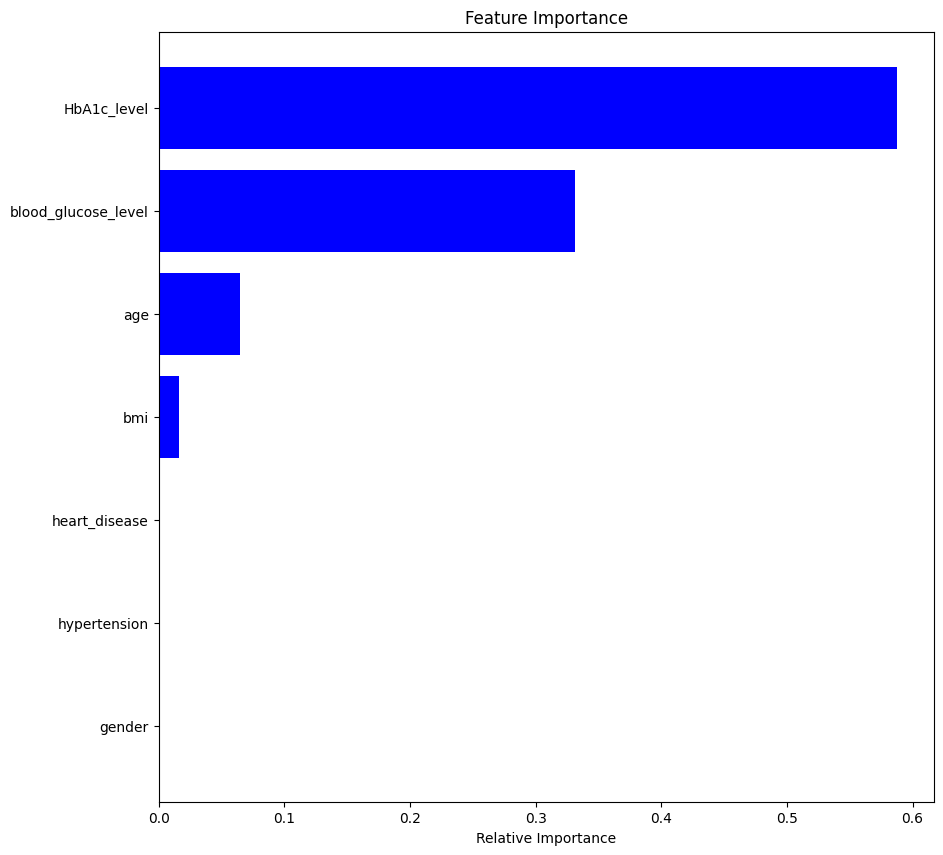

In [ ]:
# displaying the top 4 important features

import numpy as np
plt.figure(figsize=(10,10))

features = X.columns
importance = search_fit.best_estimator_.feature_importances_
indices = np.argsort(importance)

num_features = len(X.columns)

# plot feature importance
plt.barh(range(num_features), importance[indices[-num_features:]], color='b', align='center')
plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])

# define labels
plt.xlabel('Relative Importance')
plt.title('Feature Importance')

* As we can see here, the most important features are the HbA1c levels and blood glucose levels, which makes sense since we are predicting whether or not someone will have diabetes.

Visualizing the optimized tree and displaying the tree's rules

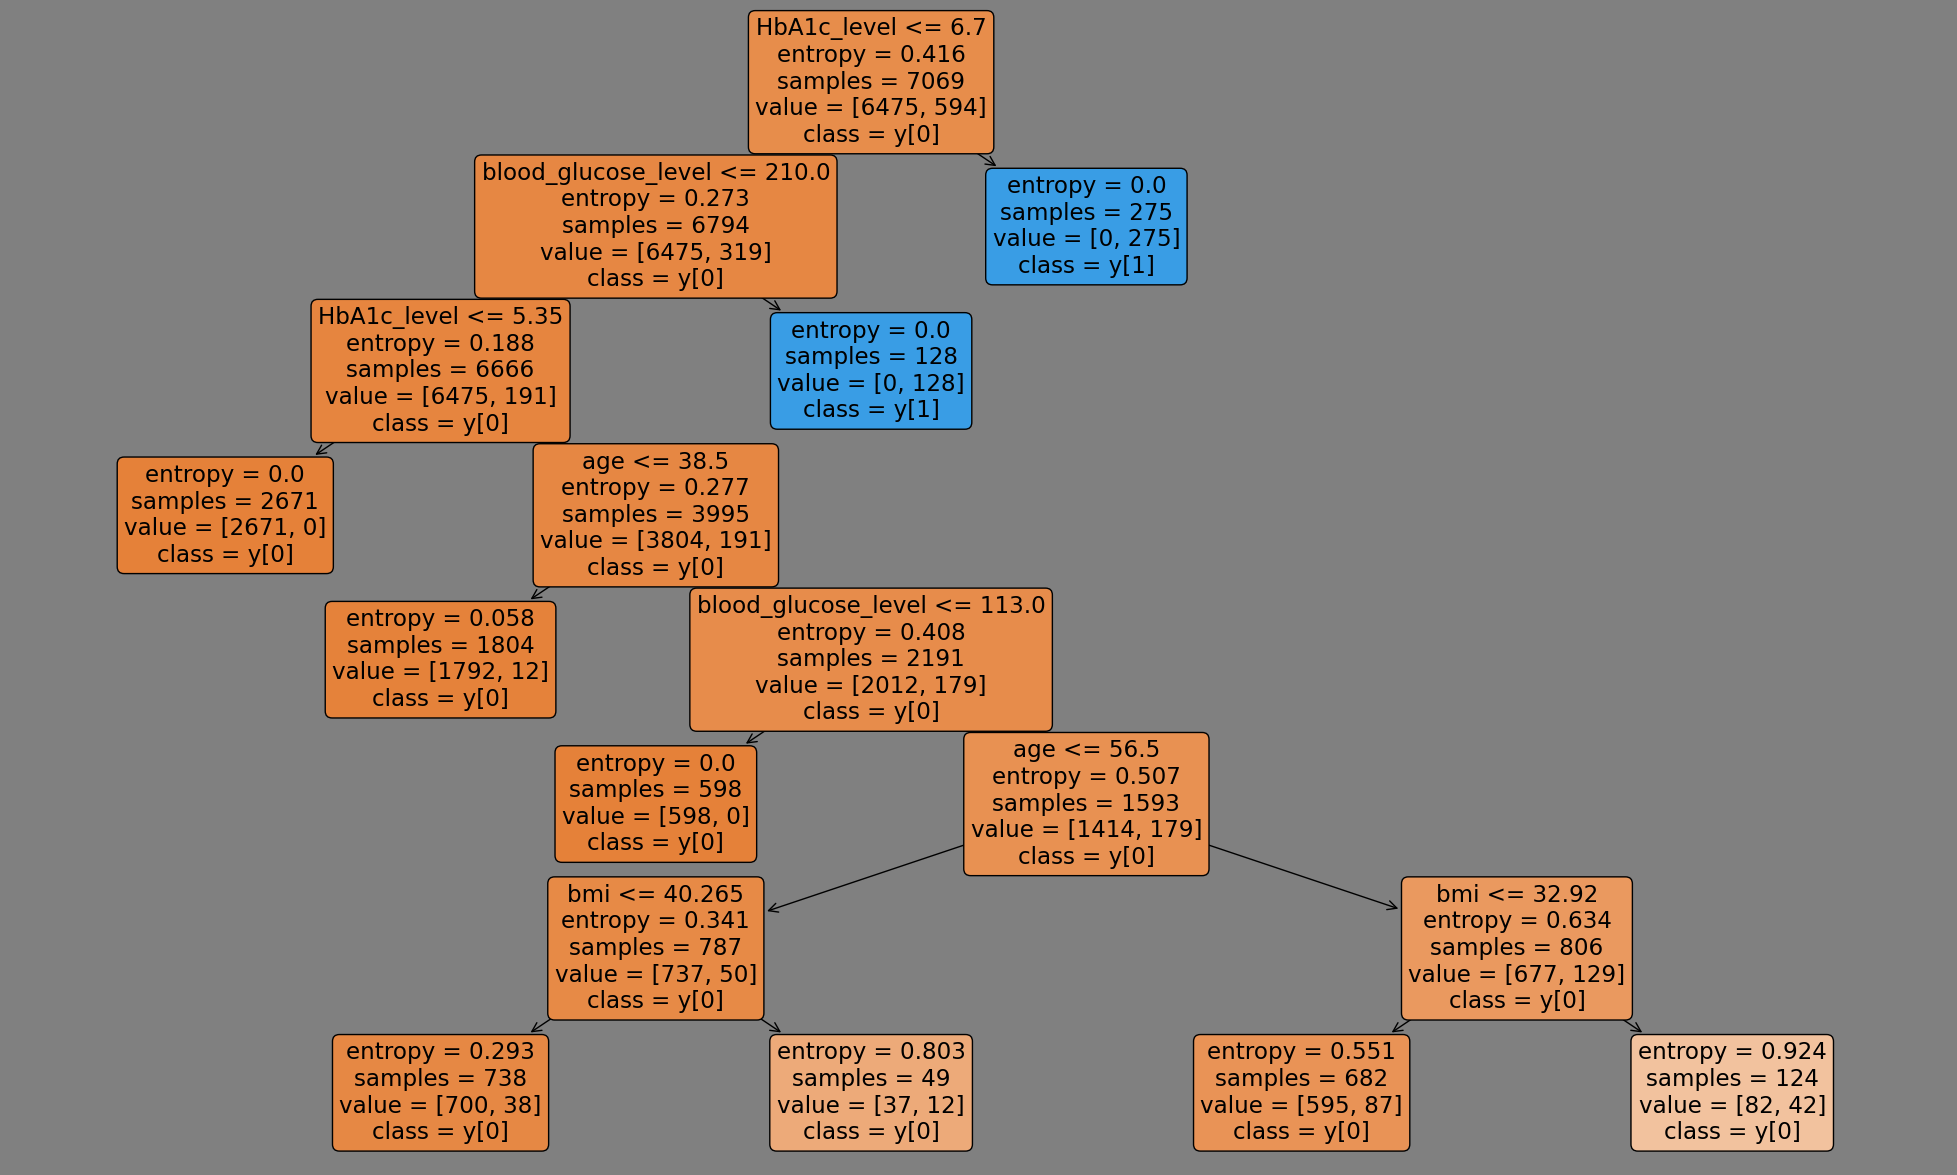

In [ ]:
# Visualize the tree using tree.plot_tree
fig, ax = plt.subplots(figsize=(25, 15), facecolor='gray')
tree.plot_tree(search_fit.best_estimator_, feature_names=X.columns, filled=True, rounded=True, class_names=True);

In [ ]:
# importing export_text from sklearn
from sklearn.tree import export_text

In [ ]:
# creating a tree rules variable
tree_rules = export_text(search_fit.best_estimator_, feature_names=list(X))

In [ ]:
# displaying the tree rules
print(tree_rules)

|--- HbA1c_level <= 6.70
|   |--- blood_glucose_level <= 210.00
|   |   |--- HbA1c_level <= 5.35
|   |   |   |--- class: 0
|   |   |--- HbA1c_level >  5.35
|   |   |   |--- age <= 38.50
|   |   |   |   |--- class: 0
|   |   |   |--- age >  38.50
|   |   |   |   |--- blood_glucose_level <= 113.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- blood_glucose_level >  113.00
|   |   |   |   |   |--- age <= 56.50
|   |   |   |   |   |   |--- bmi <= 40.26
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- bmi >  40.26
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  56.50
|   |   |   |   |   |   |--- bmi <= 32.92
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- bmi >  32.92
|   |   |   |   |   |   |   |--- class: 0
|   |--- blood_glucose_level >  210.00
|   |   |--- class: 1
|--- HbA1c_level >  6.70
|   |--- class: 1



Displaying classification reports for both the original tree and the optimized tree for comparison. We will also display both trees' ROC curves and AUC scores as well.

In [ ]:
# printing both classification reports again for side-by-side comparison

# original tree
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2753
           1       0.73      0.75      0.74       277

    accuracy                           0.95      3030
   macro avg       0.85      0.86      0.86      3030
weighted avg       0.95      0.95      0.95      3030



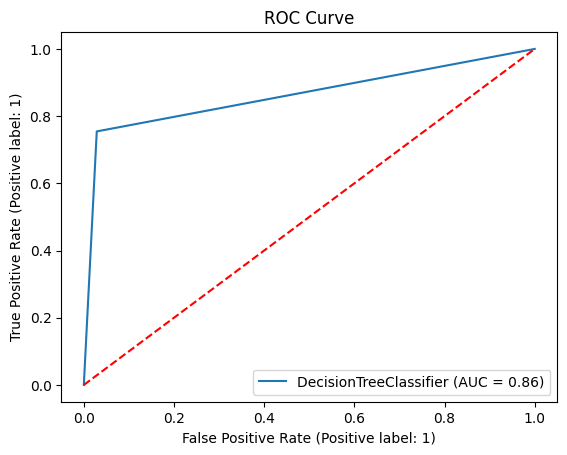

In [ ]:
# original tree's ROC Curve and AUC score
dt_roc = RocCurveDisplay.from_estimator(dtree, X_test, y_test)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title('ROC Curve');

In [ ]:
# optimized tree
print(classification_report(y_test, y_pred_post_search))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2753
           1       1.00      0.68      0.81       277

    accuracy                           0.97      3030
   macro avg       0.98      0.84      0.90      3030
weighted avg       0.97      0.97      0.97      3030



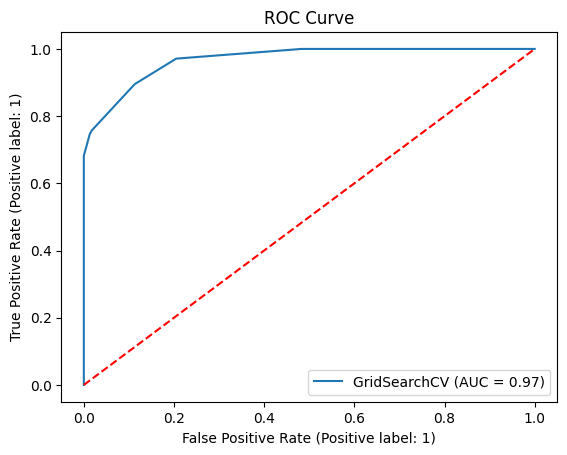

In [ ]:
# optimized tree's ROC Curve and AUC score
dt_disp = RocCurveDisplay.from_estimator(search_fit, X_test, y_test)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title('ROC Curve');

Though the original tree was accurate, the optimized tree was even more accurate and one can see what rules the tree used to make decisions. The optimzed tree has a better AUC Score (0.11 higher) and ROC Curve as well.

# 2.) Logistic Regression

* Since we have already partitioned the data earlier, we will start by scaling the training and testing data.

In [ ]:
# scale feature matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler().fit(X_train)

In [ ]:
X_train_scaled = scaler.transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

Here, we begin to build the Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
lr_model = LogisticRegression(C=0.001)

In [ ]:
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.001)

In [ ]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2753
           1       1.00      0.13      0.24       277

    accuracy                           0.92      3030
   macro avg       0.96      0.57      0.60      3030
weighted avg       0.93      0.92      0.89      3030



Using GridSearchCV

In [ ]:
# build grid search
from sklearn.model_selection import GridSearchCV

In [ ]:
param_values = {'penalty': ['l1', 'l2'],
                'C':[0.001, 0.01, 0.1, 1, 5, 10]}

In [ ]:
# instatiating the GridSearchCV
clf = LogisticRegression()

grid_clf = GridSearchCV(clf, param_values, scoring = 'recall')

In [ ]:
# fitting the trained data to the GridSearch
grid_clf.fit(X_train_scaled, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 5, 10],
                         'penalty': ['l1', 'l2']},
             scoring='recall')

In [ ]:
# predict values based on grid search
y_pred_best_lr = grid_clf.predict(X_test_scaled)

In [ ]:
grid_clf.best_estimator_

LogisticRegression(C=5)

In [ ]:
# print classification reports for both before and after the GridSearch
# Pre-GridSearch report

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96      2753
           1       1.00      0.13      0.24       277

    accuracy                           0.92      3030
   macro avg       0.96      0.57      0.60      3030
weighted avg       0.93      0.92      0.89      3030



In [ ]:
# Post-GridSearch report
print(classification_report(y_test, y_pred_best_lr))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2753
           1       0.87      0.62      0.73       277

    accuracy                           0.96      3030
   macro avg       0.92      0.81      0.85      3030
weighted avg       0.96      0.96      0.95      3030



Above we can see that the GridSearch increased the accuracy by 4% (from 0.92 to 0.96), increased its precision by 4% (0.92 to 0.96), and improved overall recall and f1-score.

# 3.) Neural Networks

We will begin by normalizing our feature matrix. The data uploading and partititioning have been done at the top of this Colab.

In [ ]:
# normalize feature matrix
from sklearn.preprocessing import StandardScaler
scaler_nn = StandardScaler()

In [ ]:
# fit our scaler
scaler_nn.fit(X_train)

StandardScaler()

In [ ]:
# scale our data X
X_train_scaled_nn = scaler_nn.transform(X_train)
X_test_scaled_nn = scaler_nn.transform(X_test)

In [ ]:
# Train NN
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()

In [ ]:
# Grid search for NN parameters
param_grid = {
    'hidden_layer_sizes': [(10, 30, 10), (20, 50, 20)],
    'activation': ['tanh', 'relu']
}

In [ ]:
# importing GridSearchCV and instantiating it
from sklearn.model_selection import GridSearchCV
clf_nn = GridSearchCV(mlp, param_grid=param_grid)

In [ ]:
# fitting the GridSearch variable
clf_nn.fit(X_train_scaled_nn, y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 30, 10), (20, 50, 20)]})

In [ ]:
# review grid results
pd.DataFrame(clf_nn.cv_results_).sort_values('rank_test_score')[['param_activation', 'param_hidden_layer_sizes', 'mean_test_score', 'rank_test_score']]

,param_activation,param_hidden_layer_sizes,mean_test_score,rank_test_score
0,tanh,"(10, 30, 10)",0.968030,1
1,tanh,"(20, 50, 20)",0.967747,2
2,relu,"(10, 30, 10)",0.967039,3
3,relu,"(20, 50, 20)",0.964917,4


In [ ]:
# identifying the best estimator for the NN
clf_nn.best_estimator_

MLPClassifier(activation='tanh', hidden_layer_sizes=(10, 30, 10))

In [ ]:
# create our prediction
y_pred_nn = clf_nn.predict(X_test_scaled_nn)

In [ ]:
# evaluate classifier performance
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2753
           1       0.95      0.69      0.80       277

    accuracy                           0.97      3030
   macro avg       0.96      0.84      0.89      3030
weighted avg       0.97      0.97      0.97      3030



Text(0.5, 1.0, 'ROC Curve')

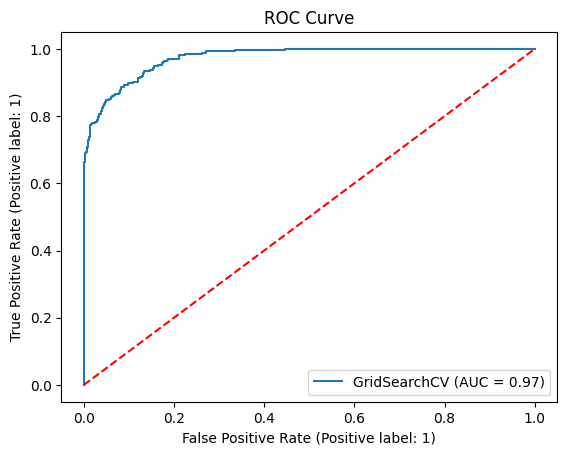

In [ ]:
# display ROC curve with AUC score
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

proj_nn_disp = RocCurveDisplay.from_estimator(clf_nn, X_test_scaled_nn, y_test)
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.title('ROC Curve')

# **Comparing the three different predicitve algorithms/classification models against each other**

In [ ]:
def classification_model_evaluation(X,y,score):
    # scoring optioon: accuracy, f1_macro, precision_macro, recall_macro
    from sklearn.preprocessing import LabelBinarizer
    from sklearn.metrics import roc_curve,roc_auc_score,auc

    
    # import models
    import pandas
    import numpy as np
    import matplotlib.pyplot as plt
    from sklearn import model_selection
    from sklearn.linear_model import LogisticRegression
    from sklearn.neural_network import MLPClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3)

    # load models
    seed = 1
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('NN', MLPClassifier()))

    
    results = []
    names = []
    models_summary = {}
    scoring = score
    # Define a result table as a DataFrame
    result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        #print("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()))
        models_summary[name] = ([cv_results.mean(),cv_results.std()])
        

        cls = model.fit(X_train,y_train)
        yproba = cls.predict_proba(X_test)[::,1]
        fpr, tpr, _ = roc_curve(y_test,  yproba)
        auc = roc_auc_score(y_test, yproba)
    
        result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                            'fpr':fpr, 
                                            'tpr':tpr, 
                                            'auc':auc}, ignore_index=True)
    
    models_summary_df = pd.DataFrame(models_summary,index=[str(score) + '_mean', str(score) + '_stdev'])

    #  model comparison boxplot
    fig = plt.figure(figsize=(10,6))
    fig.suptitle('Model Comparison \n Scoring: %s' %scoring)
    ax = fig.add_subplot(111)
    boxplot_results = pd.DataFrame(results, index=names)
    boxplot_results.assign(m=boxplot_results.mean(axis=1)).sort_values('m').drop('m', axis=1)
    
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.grid()
    plt.show()
    #print(results)
    

    # Set name of the classifiers as index labels
    result_table.set_index('classifiers', inplace=True)

    fig = plt.figure(figsize=(10,6))

    for i in result_table.index:
        plt.plot(result_table.loc[i]['fpr'], 
                 result_table.loc[i]['tpr'], 
                 label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

    plt.plot([0,1], [0,1], color='orange', linestyle='--')

    plt.xticks(np.arange(0.0, 1.1, step=0.1))
    plt.xlabel("False Positive Rate", fontsize=15)

    plt.yticks(np.arange(0.0, 1.1, step=0.1))
    plt.ylabel("True Positive Rate", fontsize=15)

    plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
    plt.legend(prop={'size':13}, loc='lower right')
    plt.grid()
    plt.show()
    
    display(models_summary_df.head(2))

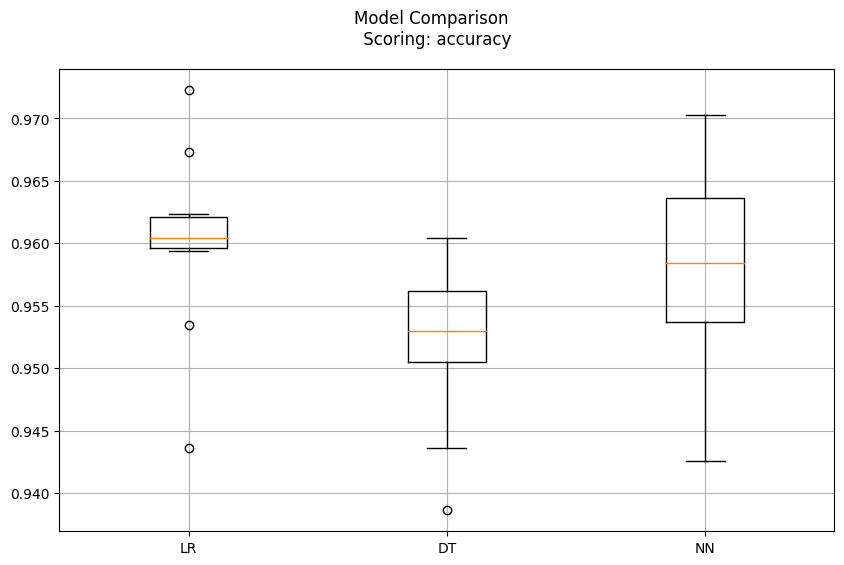

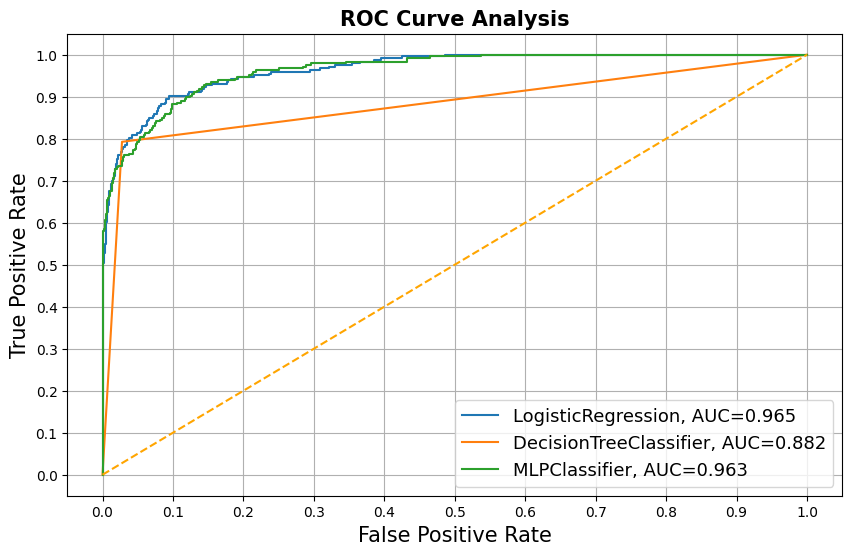

,LR,DT,NN
accuracy_mean,0.960096,0.951778,0.958116
accuracy_stdev,0.007245,0.006151,0.008327


In [ ]:
classification_model_evaluation(X,y,'accuracy')

Based on the visualizations above, it seems that Logistic Regression is the best overall classificaion model as it has the highest AUC score, best ROC curve, and the best accuracy.